In [2122]:
#Lead Scoring Assignment

In [2123]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [2124]:
#Dataset Checks

In [2125]:
# Checking Leads dataset
df = pd.read_csv("Leads.csv")

In [2126]:
# First 5 entries to get basic view of dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2127]:
# Technical Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2128]:
# Missing values checks
df.isna().mean() * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [2129]:
# Columns in dataset
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2130]:
# Prospect ID and Lead Number is not needed for analysis as of now, hence storing all other columns
cols = []
for i in df.columns:
    if (i not in ['Prospect ID', 'Lead Number']):
        cols.append(i)

In [2131]:
# Assigning the dataframe to new variable with only required columns
leads_df = df[cols]

In [2132]:
# Verifying the columns in leads_df
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2133]:
# Lead Score column value counts check
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
blog                    1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64

In [2134]:
# Since Google and google are same hence, combining both
leads_df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [2135]:
# Verifying the column again after combining Google and google
leads_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64

In [2136]:
# Since 'Select' can be considered as null/ missing values, replacing them as NaN values
leads_df = leads_df.replace('Select', np.nan)

In [2137]:
# Rejecting the columns with missing values more than 35%
cols = []
for i in leads_df.columns:
    if(leads_df[i].isna().mean() * 100 <= 35):
        cols.append(i)

In [2138]:
# Assigning to leads_df
leads_df = leads_df[cols]

In [2139]:
# Missing value checks
leads_df.isna().mean() * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [2140]:
# Checking the value count of variable : What matters most to you in choosing a course
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [2141]:
# Since there are some missing values which are unknown hence replaced as Other
leads_df['What matters most to you in choosing a course'].fillna('Other', inplace = True)

In [2142]:
# Missing values checks
leads_df.isna().mean() * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [2143]:
# Checking the value count of variable : What is your current occupation
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2144]:
# Since there are some missing values which are unknown hence replaced as Other
leads_df['What is your current occupation'].fillna('Other', inplace = True)

In [2145]:
# Missing values checks
leads_df.isna().mean() * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [2146]:
# Checking the value count of variable : Country
leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Philippines                2
Belgium                    2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Ghana                      2
Italy                      2
Netherlands                2
Sri Lanka                  1
Malaysia                   1
Russia                     1
Vietnam                    1
Liberia                    1
Kenya                      1
Indonesia     

In [2147]:
# Since there are some missing values which are unknown hence replaced as unknown
leads_df['Country'].fillna('unknown', inplace = True)

In [2148]:
# Missing values checks
leads_df.isna().mean() * 100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [2149]:
# There are some minor number of missing values now, so we are dropping those rows
leads_df = leads_df.dropna()

In [2150]:
# Missing values checks
# We have completed with missing values treatment and there are no missing values in data now.
leads_df.isna().mean() * 100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [2151]:
# Checking the leads_df first 5 entries
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [2152]:
# Checking leads_df columns
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2153]:
# Checking all the columns value counts
for i in leads_df.columns:
    print('----------------------------------------------')
    print(leads_df[i].value_counts())

----------------------------------------------
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------
Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64
----------------------------------------------
No     8358
Yes     716
Name: Do Not Email, dtype: int64
----------------------------------------------
No     9072
Yes       2
Name: Do Not Call, 

In [2154]:
# Stored categorical columns in cat_cols
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
           'What is your current occupation', 'What matters most to you in choosing a course', 'Search',
           'Magazine', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Digital Advertisement',
           'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
           'Last Notable Activity']

In [2155]:
# Initial assignment for num_cols
num_cols = []

In [2156]:
# Storing numerical columns in num_cols
for i in leads_df.columns:
    if i not in cat_cols:
        num_cols.append(i)

In [2157]:
# Checking num_cols
num_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

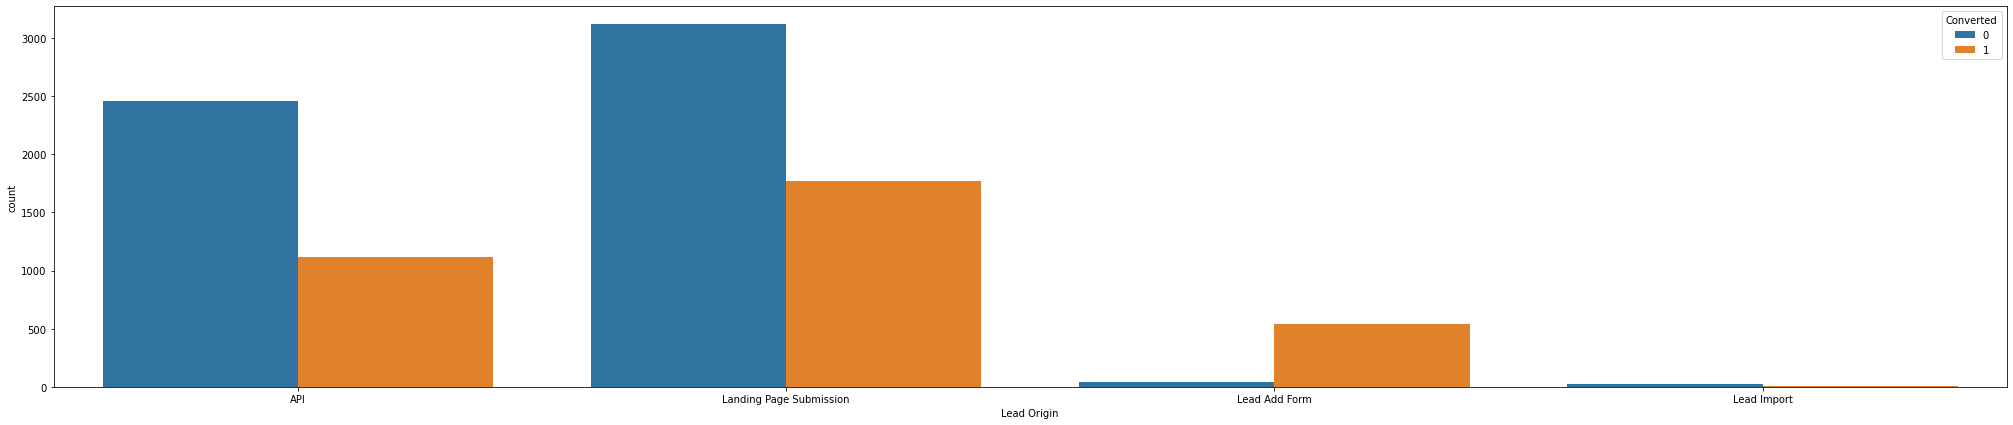

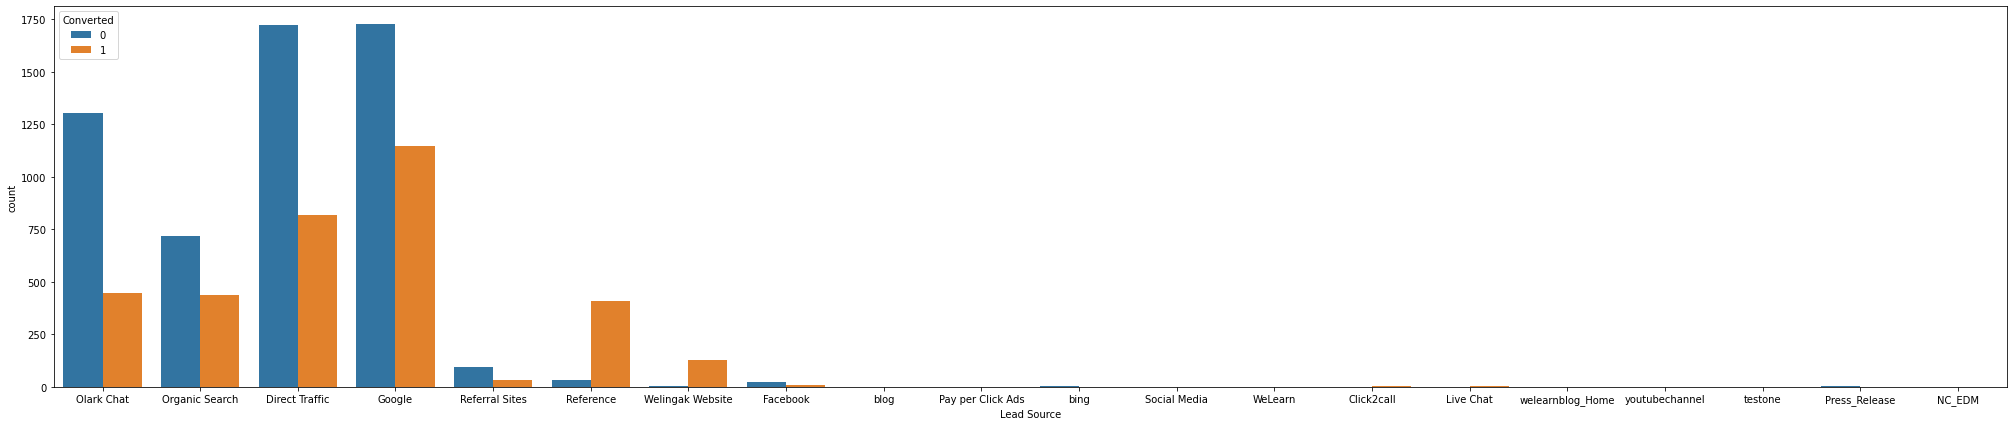

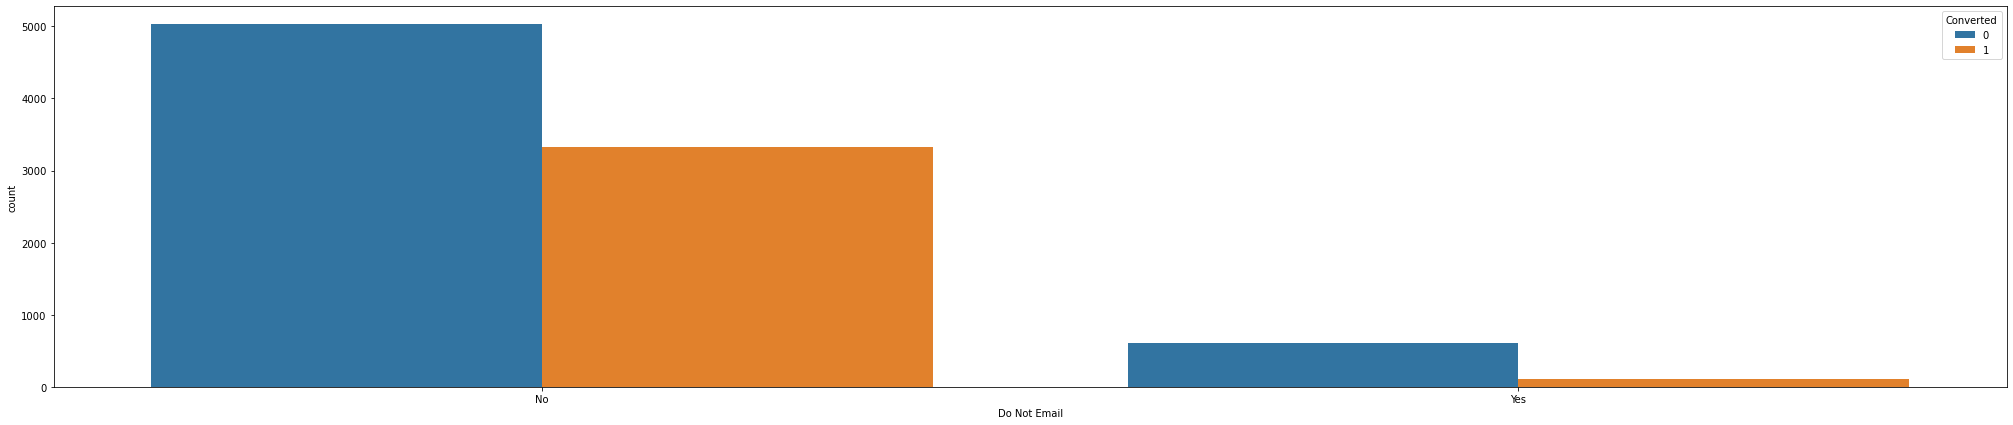

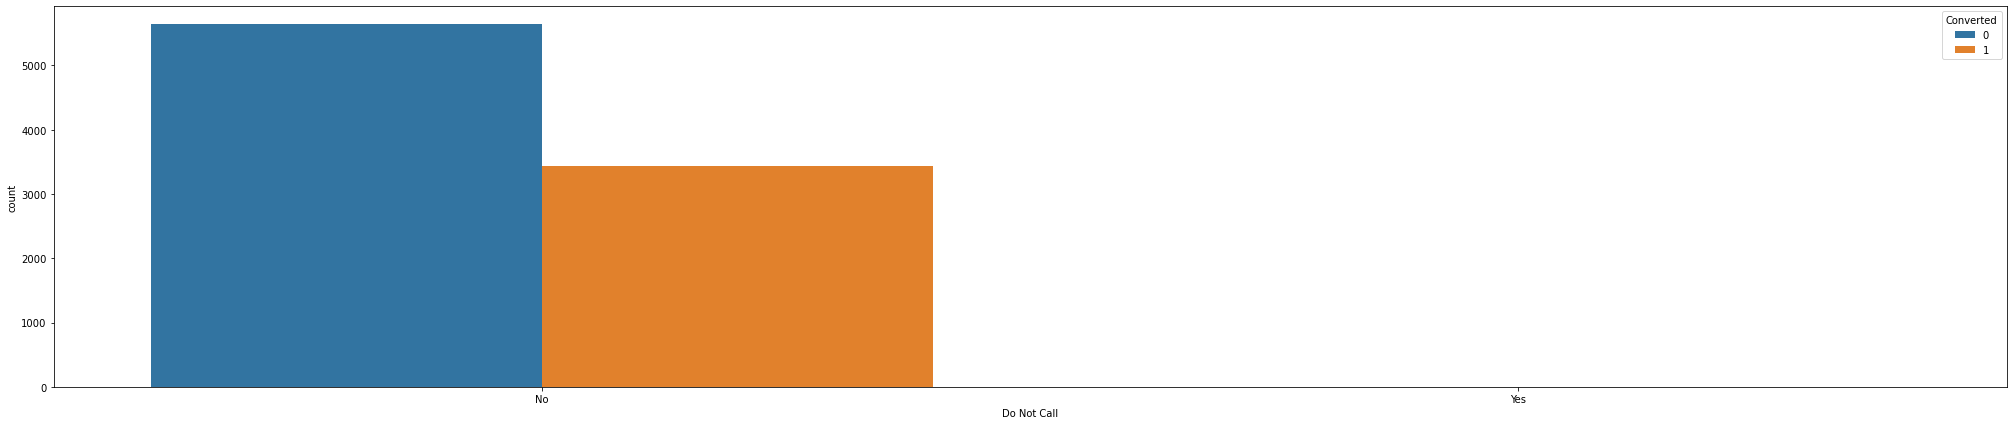

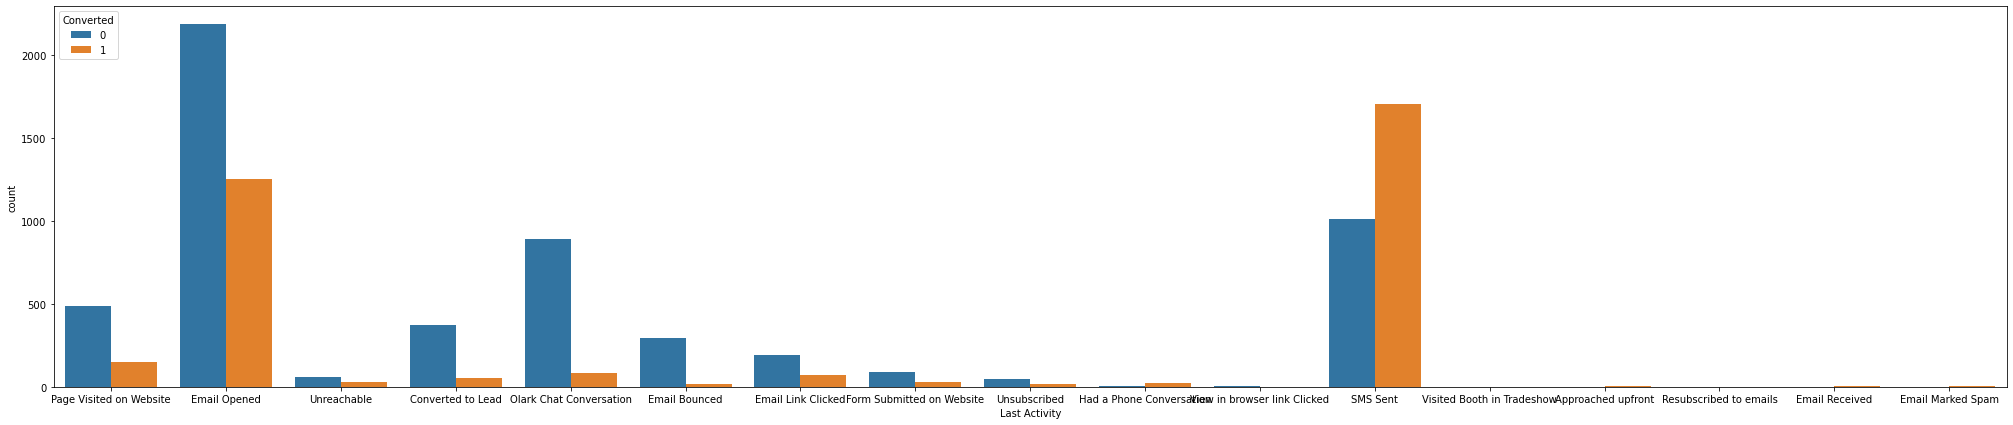

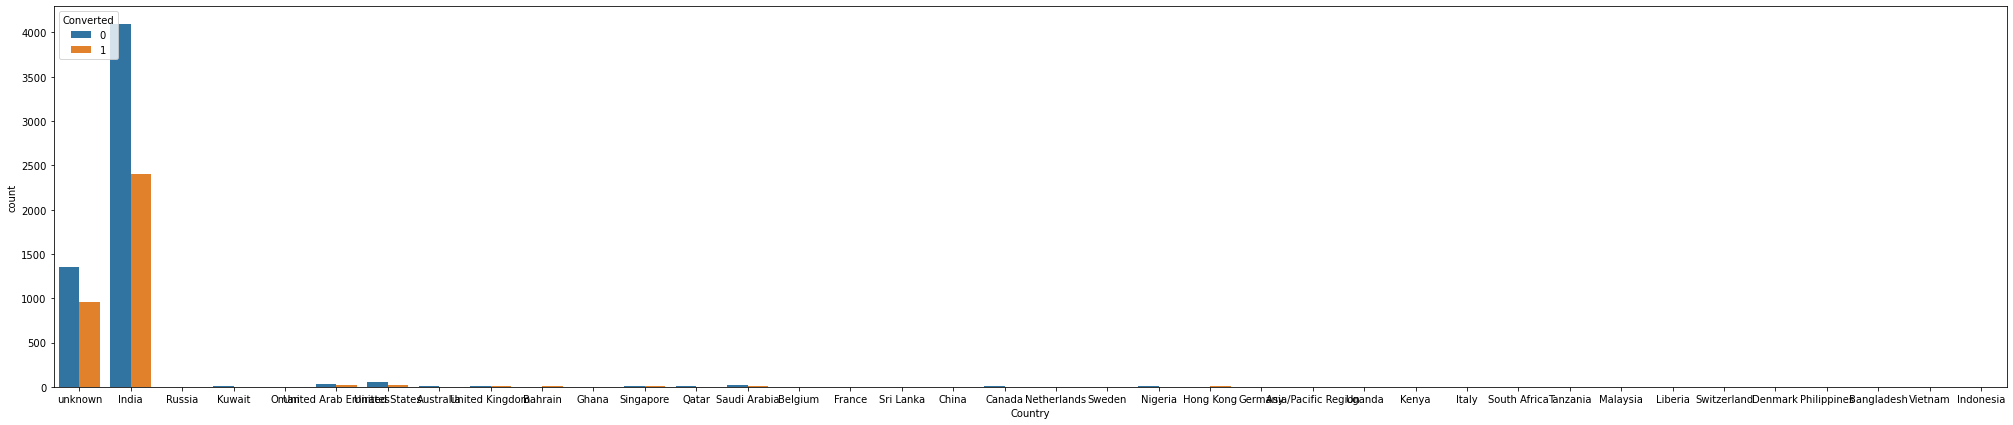

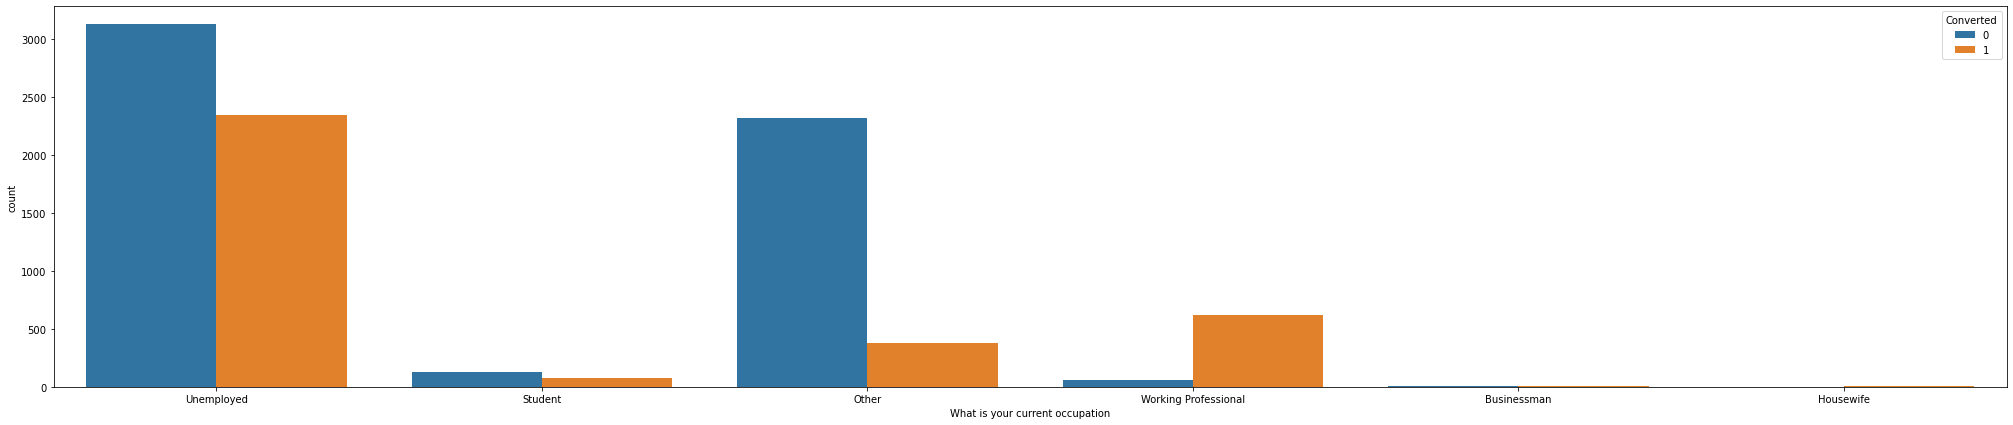

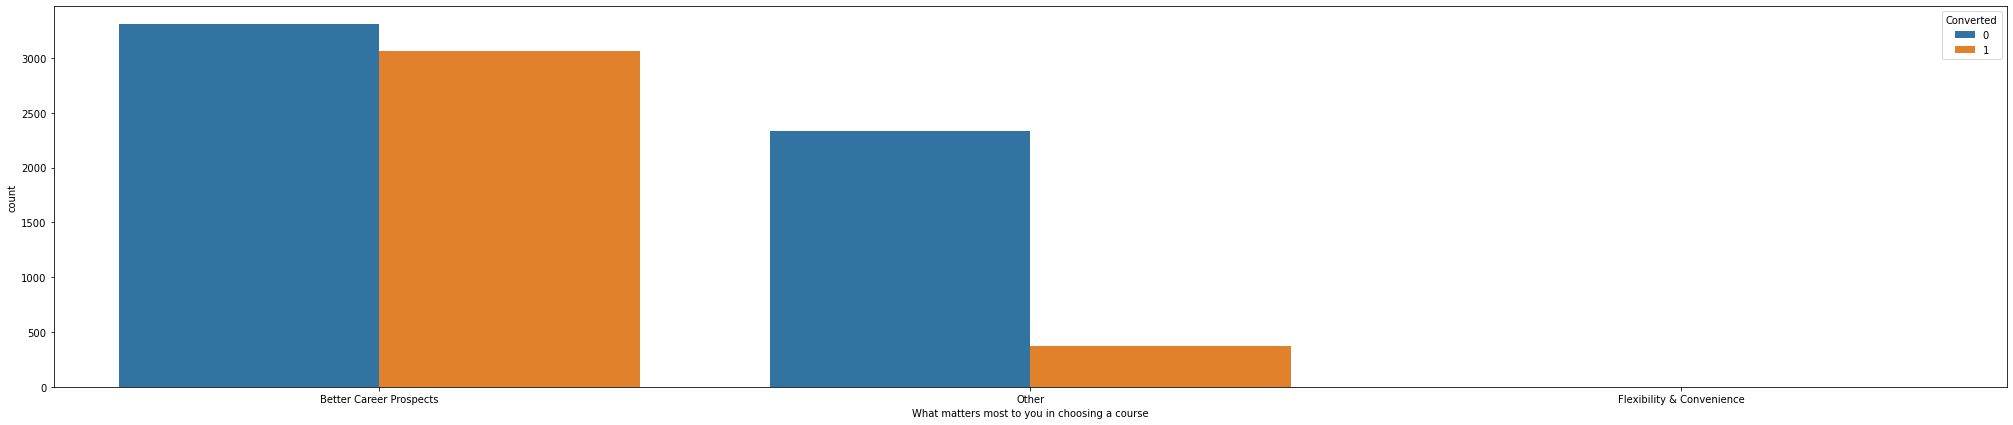

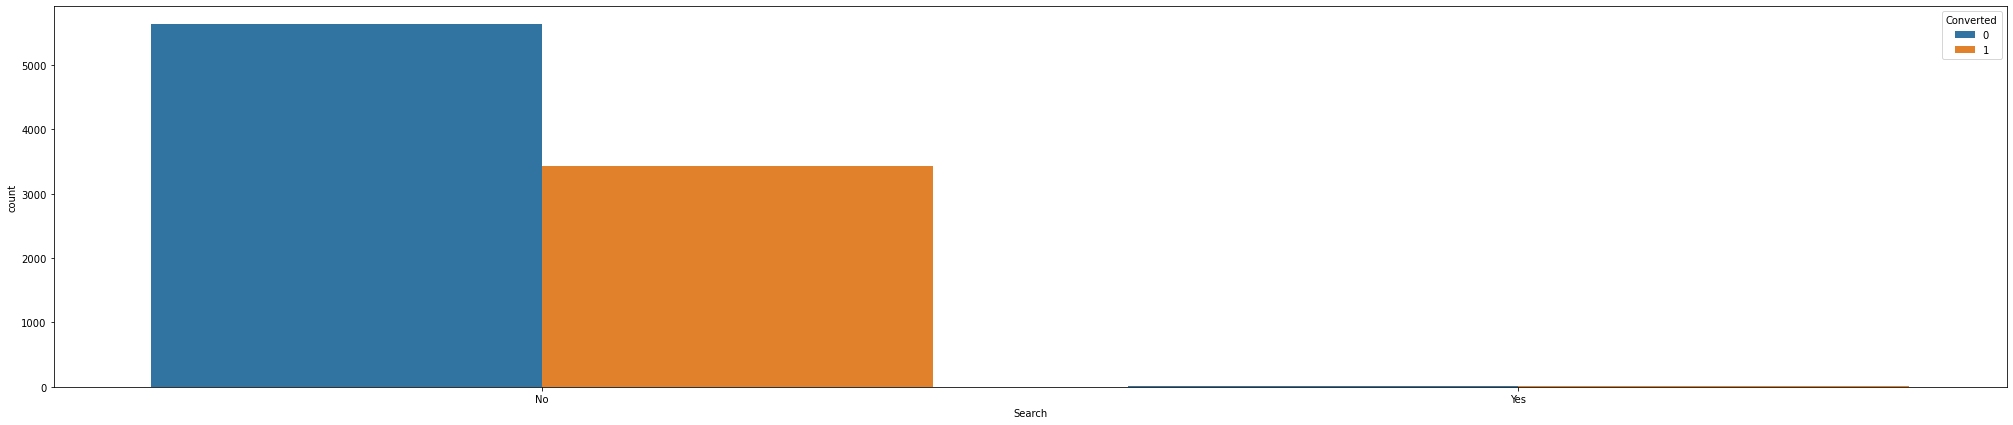

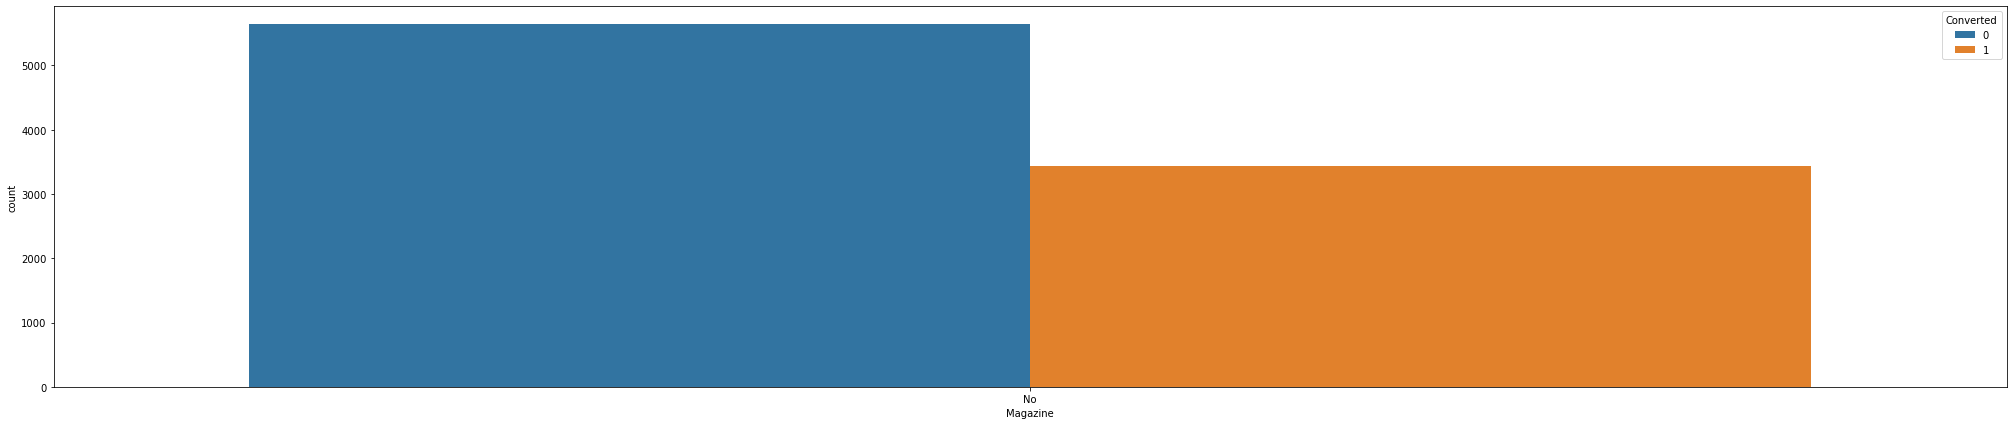

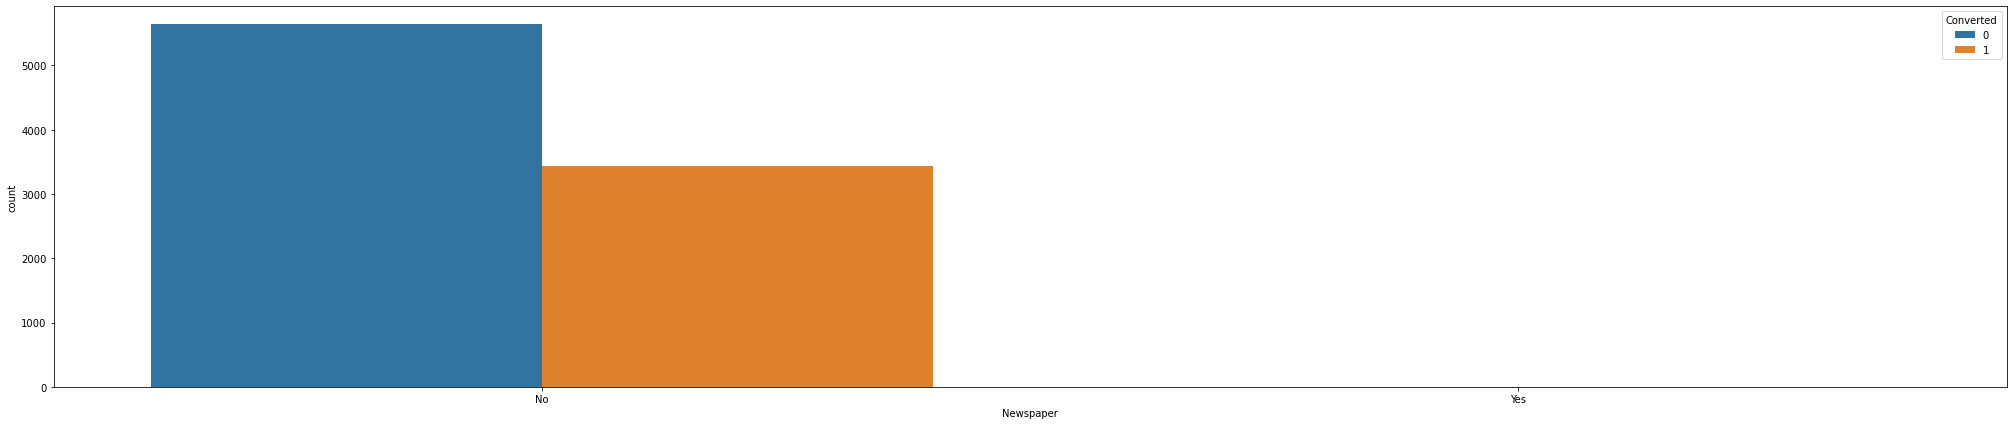

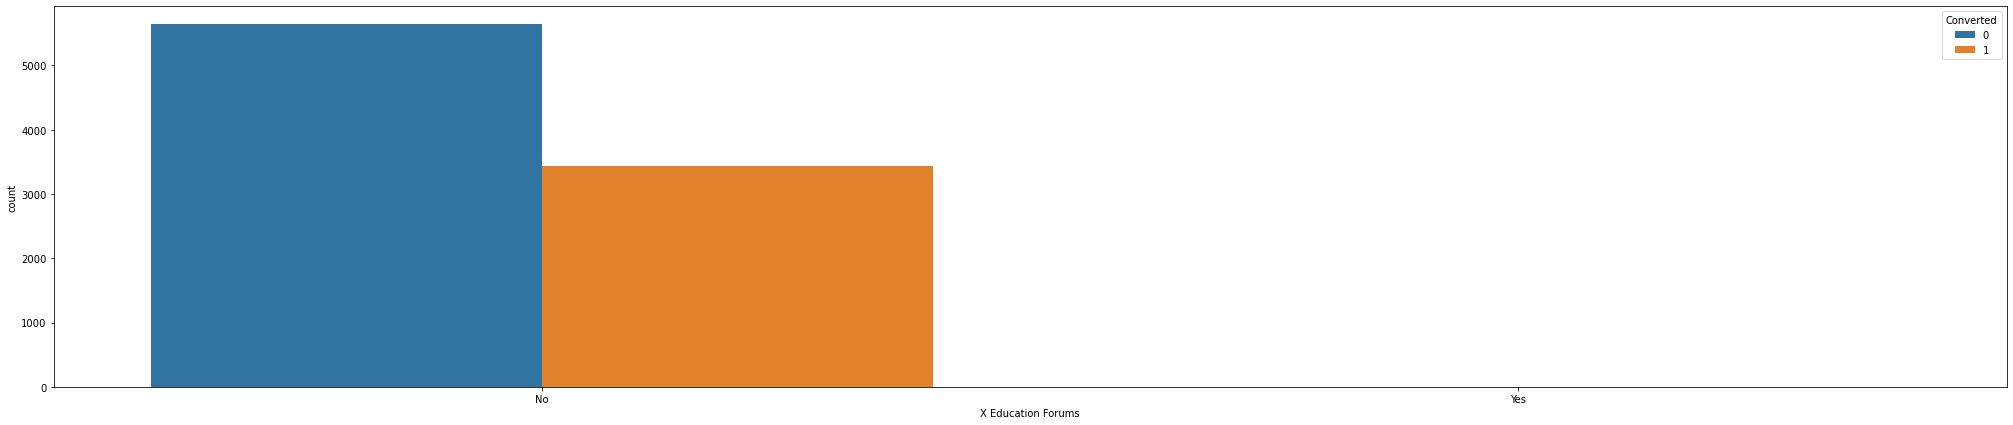

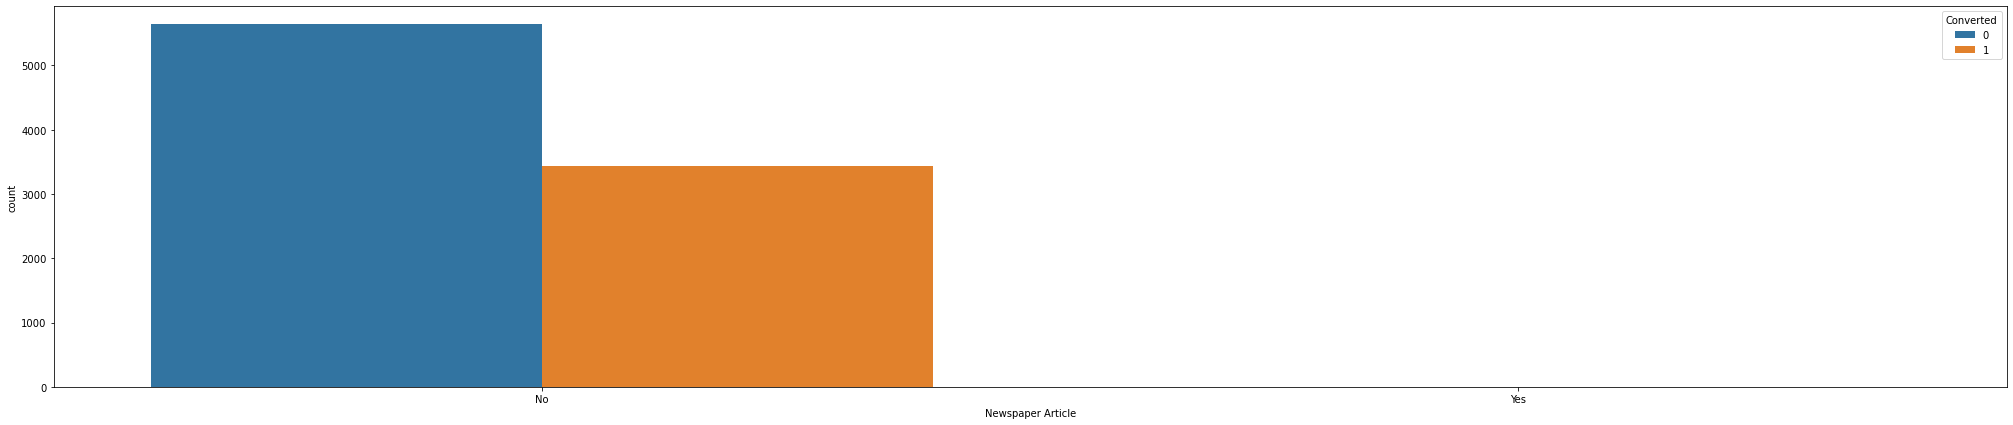

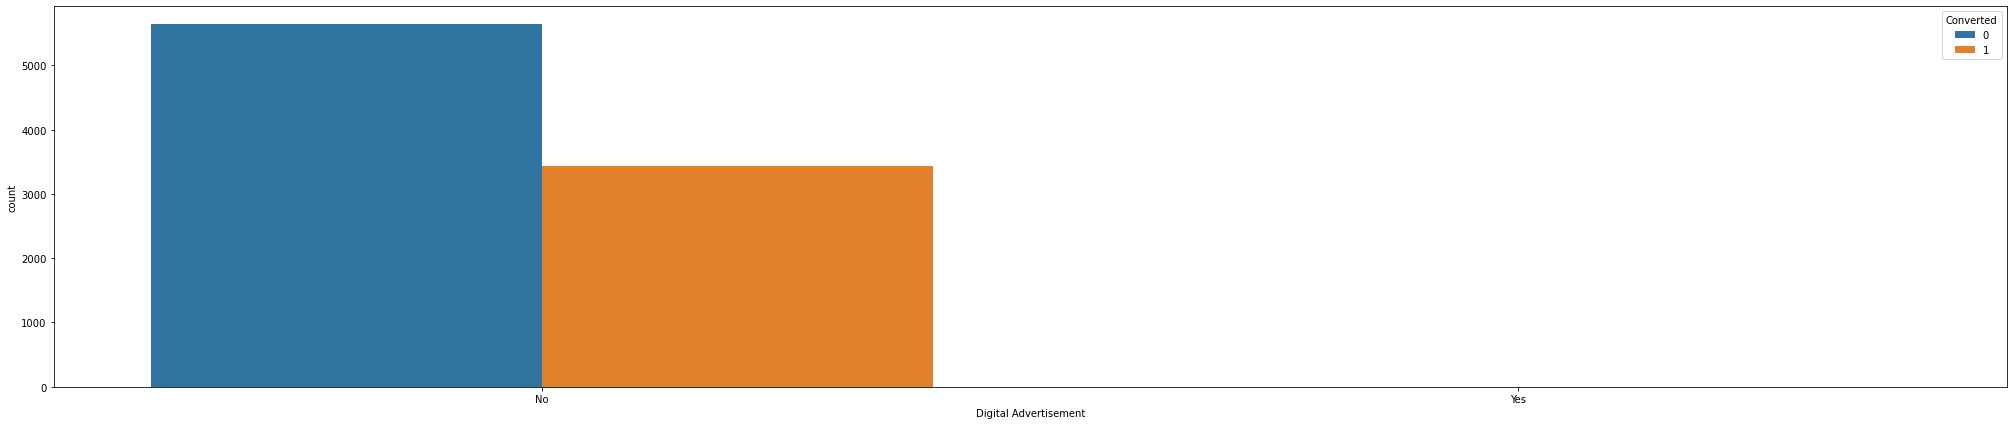

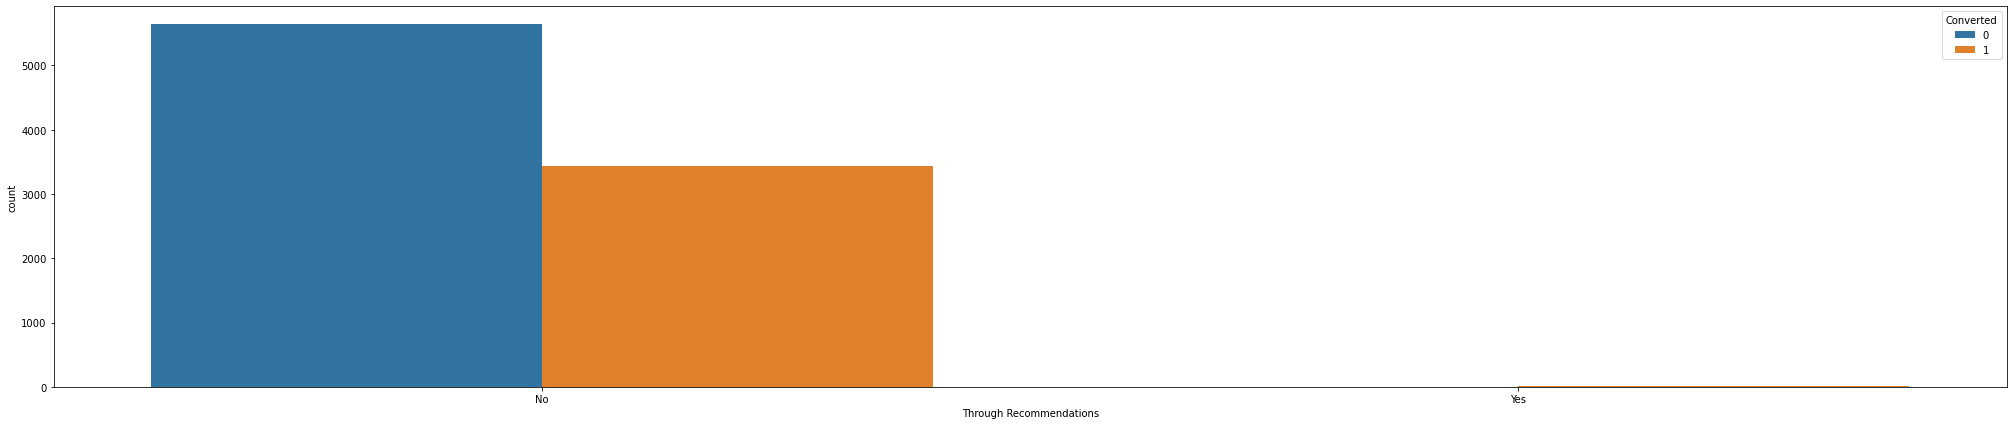

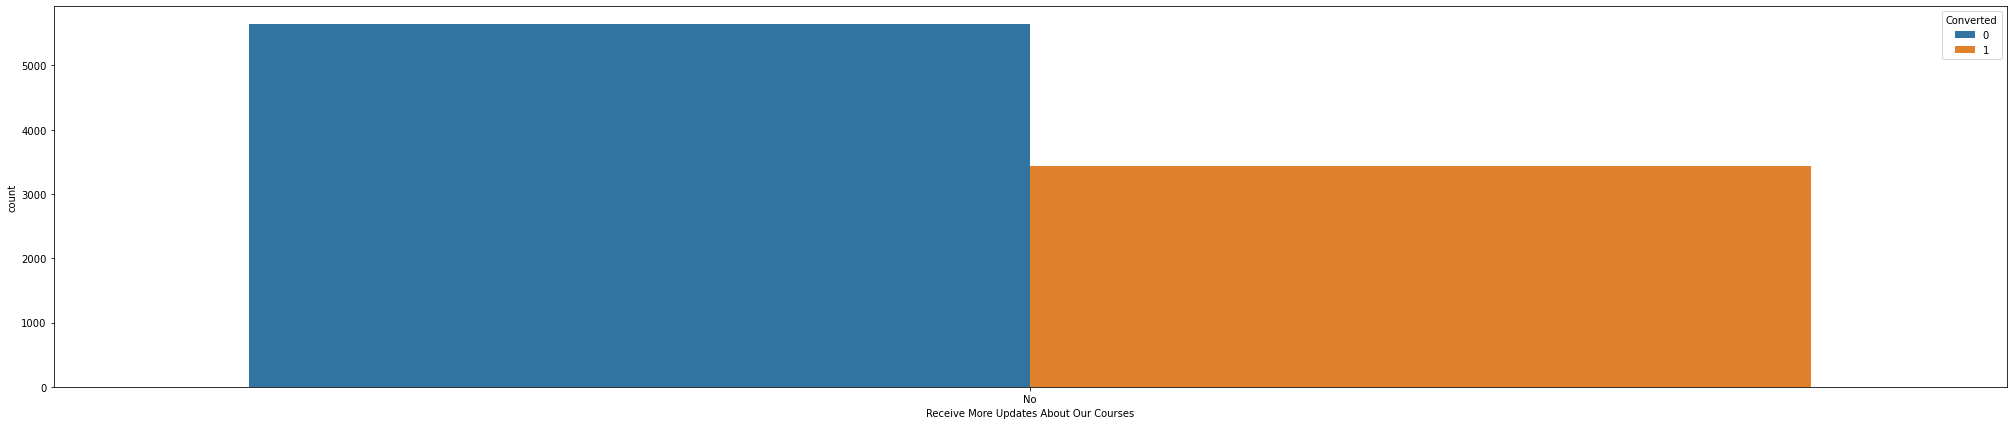

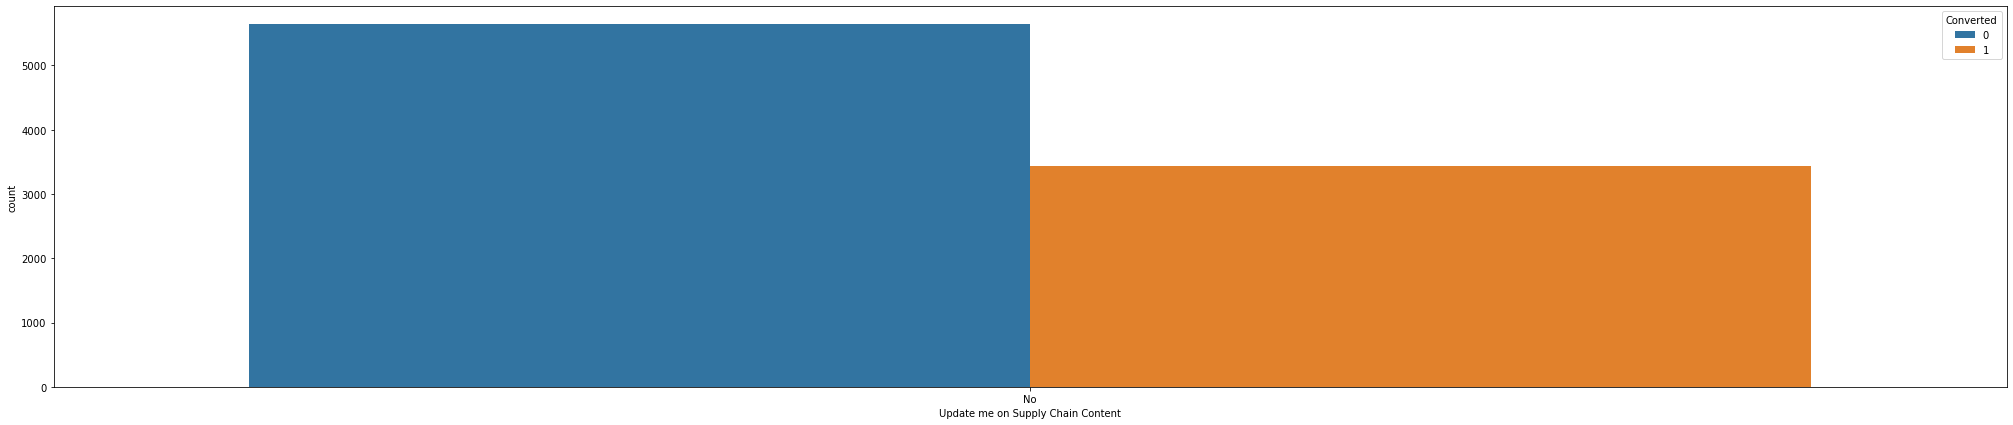

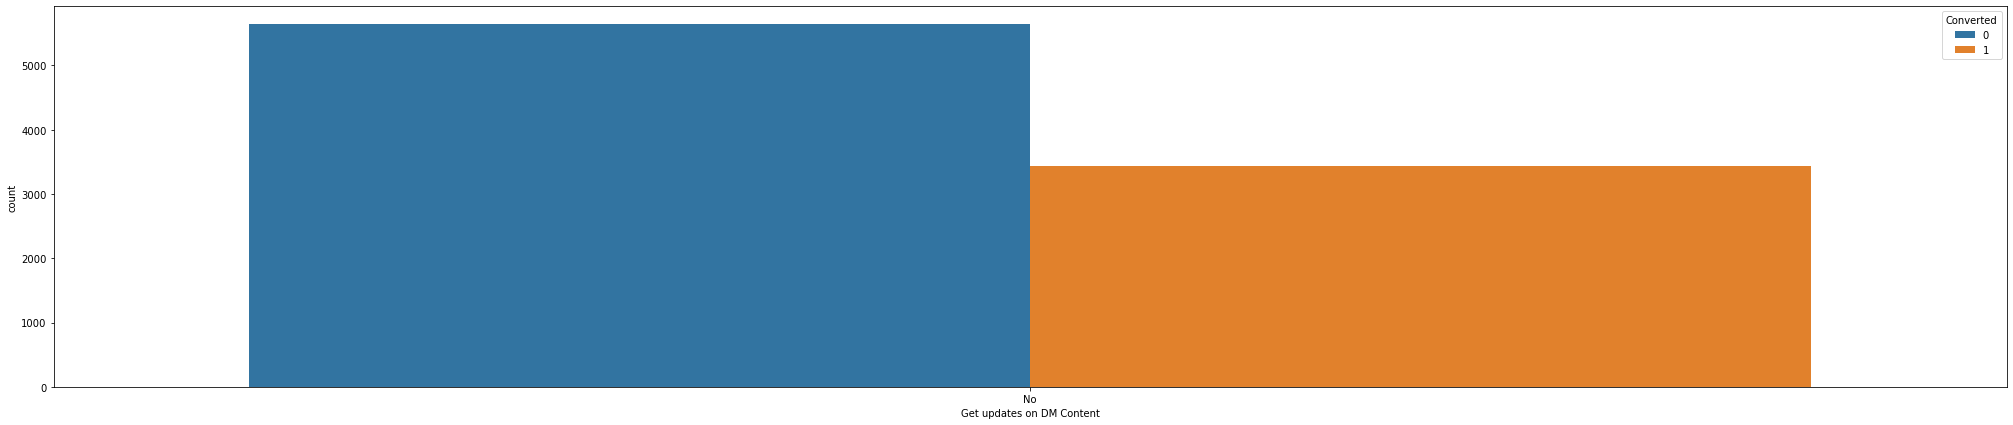

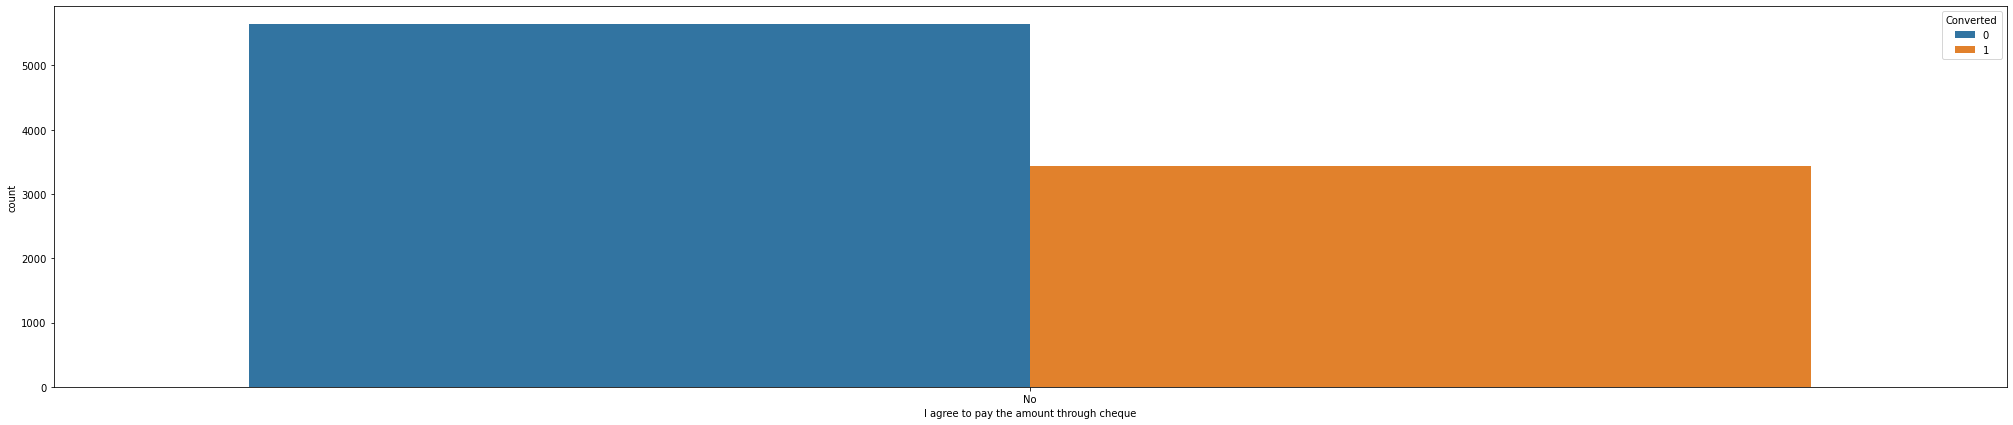

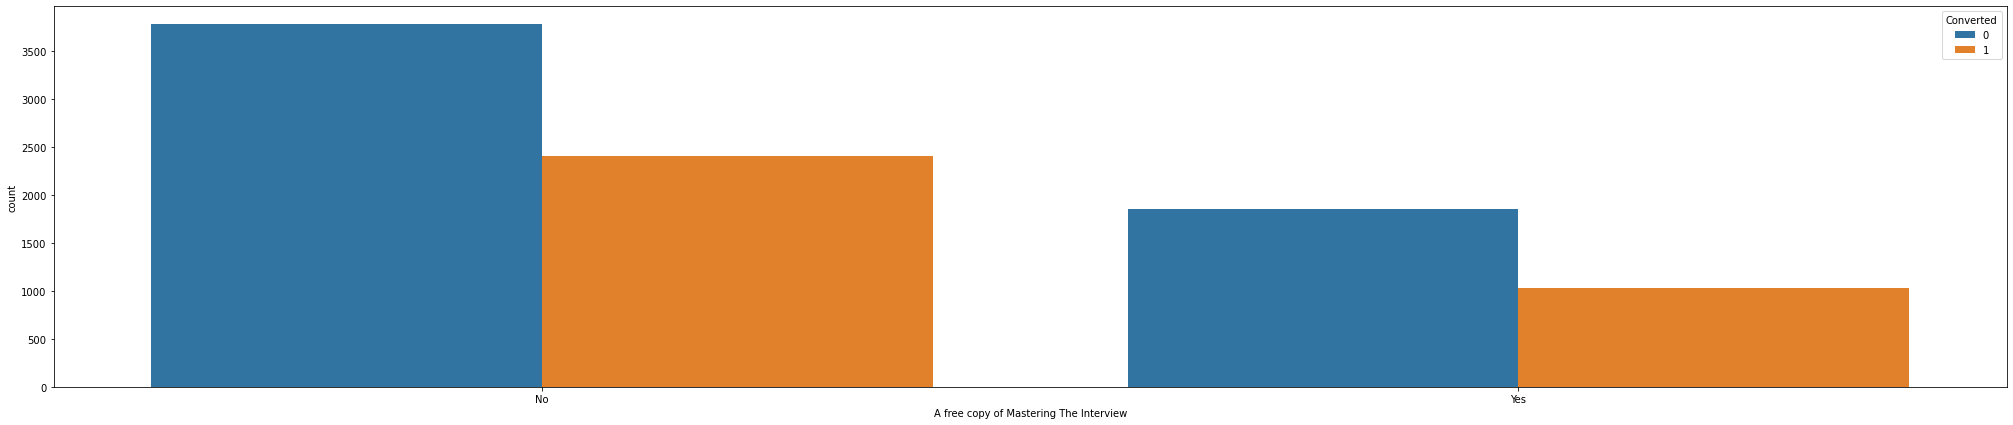

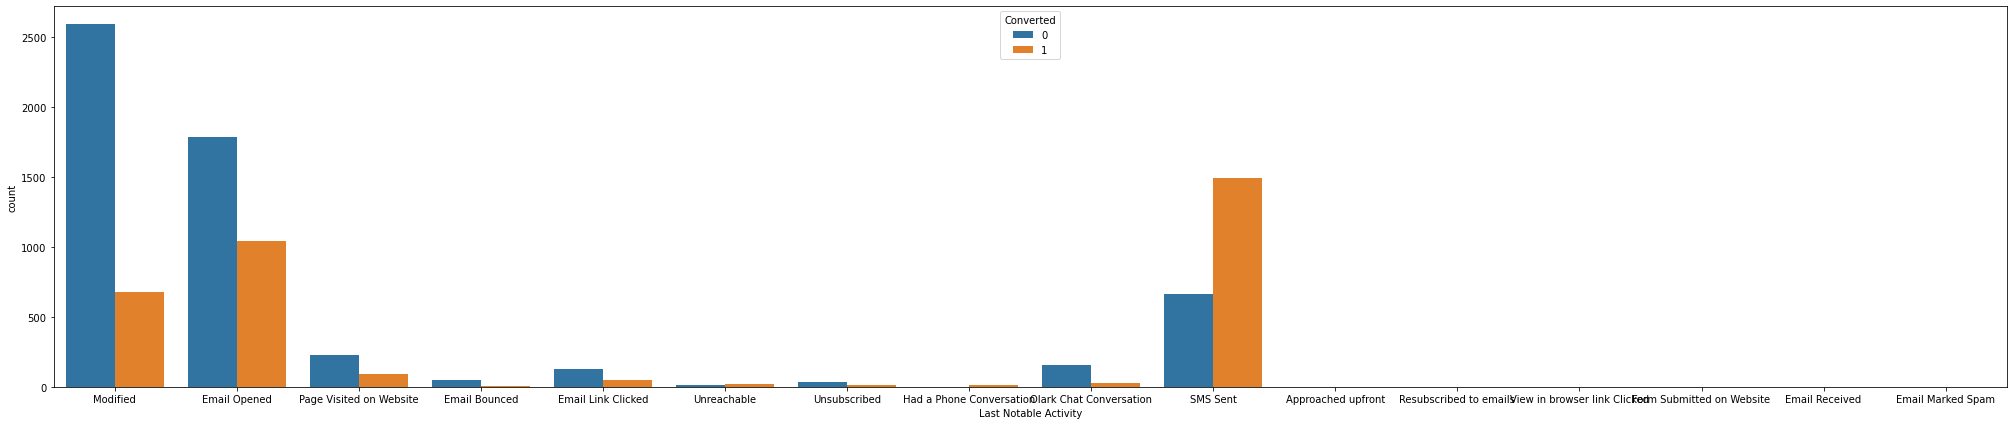

In [2158]:
# Univaraite Analysis for categorical columns
for i in cat_cols:
    plt.figure(figsize = (35, 7))
    sns.countplot(x = i, hue = 'Converted', data = leads_df)
    plt.show()

In [ ]:
# 'Lead Add Form' have high conversion rate.
# Max leads are from 'Direct Traffic' and 'Google' 
# Reference' and 'Welingak website' have high conversion rate
# 'Email Opened' Leads are max and 'SMS Sent' have high conversion rate
# Max Leads are from 'India' but many other seems to be 'unknown'
# Max Leads are 'Unemployed' and some of them haven't mentioned that is 'Other'
# 'Working Professional' have high conversion rate
# We are dropping other variables due to data imbalance and insignificance

In [2159]:
# Storing the significant categorical columns in keep_cols
keep_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'What is your current occupation']

In [2160]:
# Initiating cat_cols
cat_cols = []

In [2161]:
# Storing in categorical columns
for i in keep_cols:
    cat_cols.append(i)

In [2162]:
# Verifying cat_cols
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'What is your current occupation']

In [2163]:
# Verifying num_cols
num_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [2164]:
# Storing required num_cols and cat_cols in final_cols
final_cols = num_cols + cat_cols

In [2165]:
# Verifying final_cols
final_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'What is your current occupation']

In [2166]:
# Storing required columns data in leads_df
leads_df = leads_df[final_cols]

In [2167]:
# Checking leads_df first 5 entries
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,Do Not Email,What is your current occupation
0,0,0.0,0,0.0,API,Olark Chat,No,Unemployed
1,0,5.0,674,2.5,API,Organic Search,No,Unemployed
2,1,2.0,1532,2.0,Landing Page Submission,Direct Traffic,No,Student
3,0,1.0,305,1.0,Landing Page Submission,Direct Traffic,No,Unemployed
4,1,2.0,1428,1.0,Landing Page Submission,Google,No,Unemployed


Converted


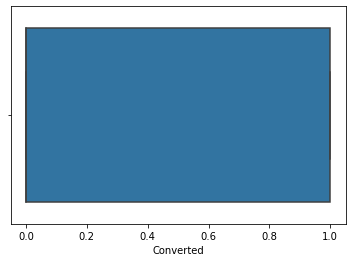

TotalVisits


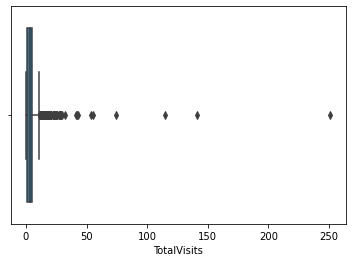

Total Time Spent on Website


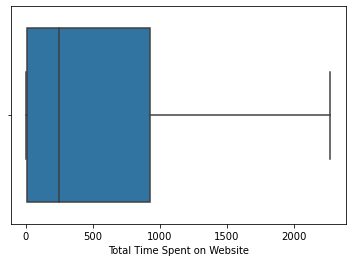

Page Views Per Visit


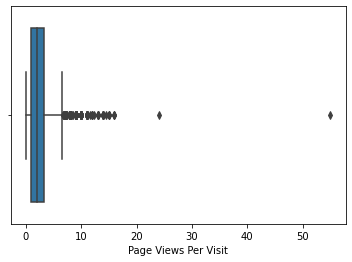

In [2168]:
# Univaraite analysis for numerical columns
for i in num_cols:
    print(i)
    sns.boxplot(leads_df[i])
    plt.show()

In [ ]:
# 'Page Views Per Visit' and 'TotalVisits' have outliers

In [2169]:
# Checking the percentiles
leads_df['TotalVisits'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [2170]:
# Storing Lower limit
lower_limit = leads_df['TotalVisits'].quantile(0.05)

In [2171]:
# Storing Upper limit
upper_limit = leads_df['TotalVisits'].quantile(0.95)

In [2172]:
# Setting outliers under lower and upper limit
leads_df['TotalVisits'] = np.where(leads_df['TotalVisits'] >= upper_limit, upper_limit, np.where(leads_df['TotalVisits'] <= lower_limit, lower_limit, leads_df['TotalVisits']))

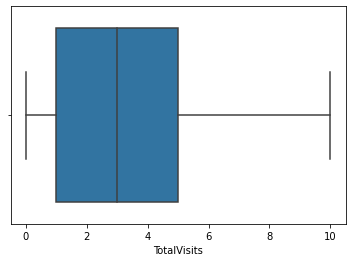

In [2173]:
# Checking boxplot after outliers treatment
sns.boxplot(leads_df['TotalVisits'])
plt.show()

In [2174]:
# Checking the percentiles
leads_df['Page Views Per Visit'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [2175]:
# Storing Lower limit
lower_limit = leads_df['Page Views Per Visit'].quantile(0.05)

In [2176]:
# Storing Upper limit
upper_limit = leads_df['Page Views Per Visit'].quantile(0.95)

In [2177]:
# Setting outliers under lower and upper limit
leads_df['Page Views Per Visit'] = np.where(leads_df['Page Views Per Visit'] >= upper_limit, upper_limit, np.where(leads_df['Page Views Per Visit'] <= lower_limit, lower_limit, leads_df['Page Views Per Visit']))

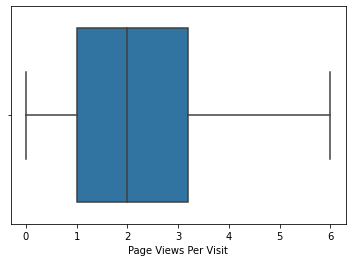

In [2178]:
# Checking boxplot after outliers treatment
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

Converted


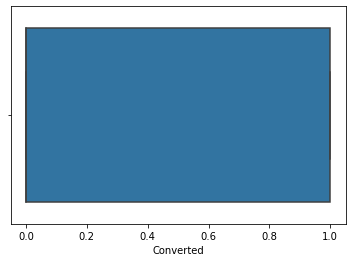

TotalVisits


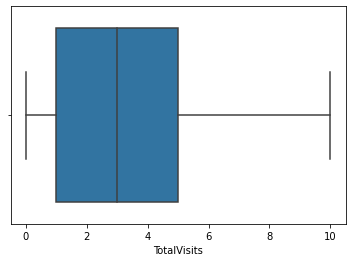

Total Time Spent on Website


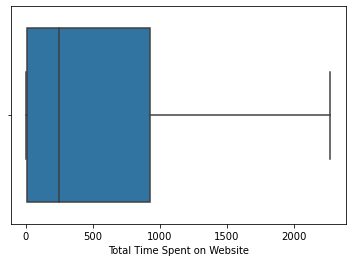

Page Views Per Visit


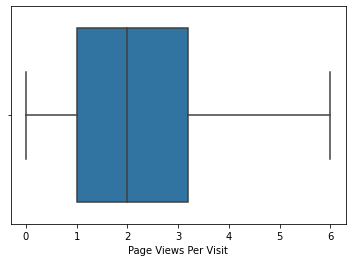

In [2179]:
# Verifying the num_cols after outliers treatment
for i in num_cols:
    print(i)
    sns.boxplot(leads_df[i])
    plt.show()

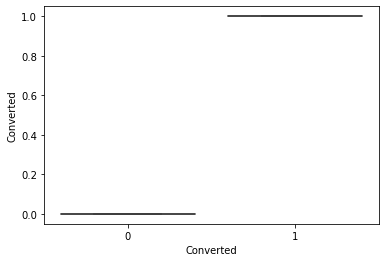

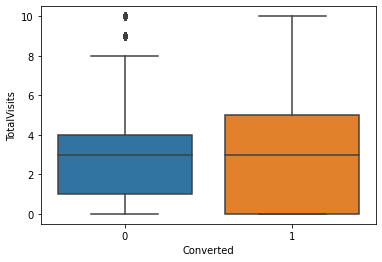

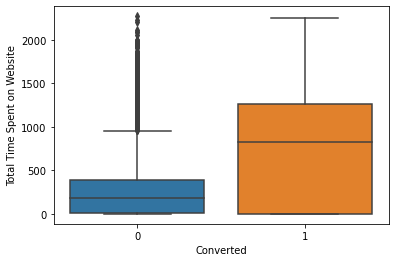

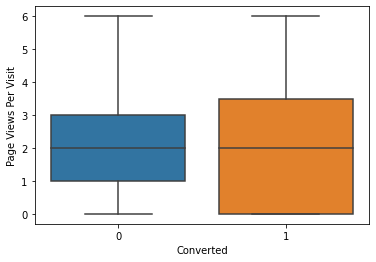

In [2180]:
# Checking the num_cols along with 'Converted' variable
for i in num_cols:
    sns.boxplot(y = i, x = 'Converted', data = leads_df)
    plt.show()

In [ ]:
# People who spent more time on website are more likely to be converted

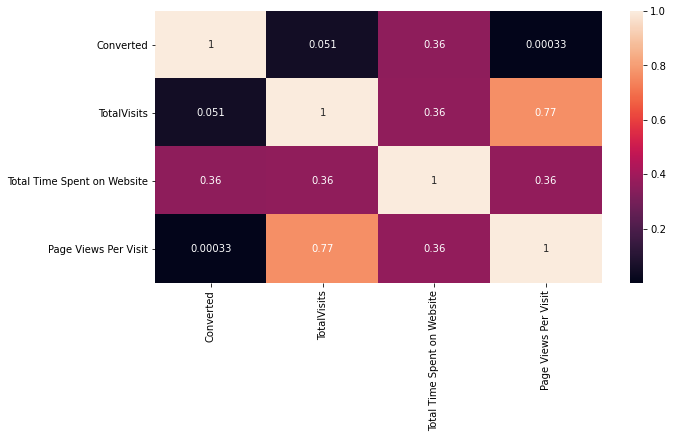

In [2181]:
# Heatmap for num_cols in dataframe
plt.figure(figsize = (10, 5))
sns.heatmap(leads_df.corr(), annot = True)
plt.show()

In [2182]:
# Checking leads_df with final_cols
leads_df[final_cols].head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,Do Not Email,What is your current occupation
0,0,0.0,0,0.0,API,Olark Chat,No,Unemployed
1,0,5.0,674,2.5,API,Organic Search,No,Unemployed
2,1,2.0,1532,2.0,Landing Page Submission,Direct Traffic,No,Student
3,0,1.0,305,1.0,Landing Page Submission,Direct Traffic,No,Unemployed
4,1,2.0,1428,1.0,Landing Page Submission,Google,No,Unemployed


In [2183]:
# Mapping 'Yes' to 1 and 'No' to 0
leads_df['Do Not Email'] = leads_df['Do Not Email'].map({"No" : 0, "Yes" : 1})

In [2184]:
# Checking leads_df with final_cols
leads_df[final_cols].head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,Do Not Email,What is your current occupation
0,0,0.0,0,0.0,API,Olark Chat,0,Unemployed
1,0,5.0,674,2.5,API,Organic Search,0,Unemployed
2,1,2.0,1532,2.0,Landing Page Submission,Direct Traffic,0,Student
3,0,1.0,305,1.0,Landing Page Submission,Direct Traffic,0,Unemployed
4,1,2.0,1428,1.0,Landing Page Submission,Google,0,Unemployed


In [2185]:
# Creating dummy variables for categorical columns
dum_cols = ['Lead Origin', 'Lead Source', 'What is your current occupation']

In [2186]:
# Creating dummies and dropping first from each dummy variables
dummies = pd.get_dummies(leads_df[dum_cols], drop_first = True)

In [2187]:
# Concatenating dummies with leads_df
leads_df = pd.concat([leads_df, dummies], axis = 1)

In [2188]:
# Dropping original categorical columns, since we have dummy varaibles now
leads_df.drop(dum_cols, axis = 1, inplace = True)

In [2189]:
# Checking leads_df after addition of dummy variables
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2190]:
# Checking columns in leads_df
leads_df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Do Not Email',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is

In [2191]:
# Storing all other columns in X apart from 'Converted'
X = leads_df.drop("Converted", axis = 1)

In [2192]:
# Storing 'Converted' in y
y = leads_df['Converted']

In [2193]:
# Libraries necessary for train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [2194]:
# Checking the shapes after the split
print("Train X shape:", X_train.shape)
print("Test X shape:", X_test.shape)
print("Train y shape:", y_train.shape)
print("Test y shape:", y_test.shape)

Train X shape: (6351, 31)
Test X shape: (2723, 31)
Train y shape: (6351,)
Test y shape: (2723,)


In [2195]:
# Scaling the X variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2196]:
# Assigning X columns to sclaed dataframes
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [2197]:
# Checking X_Test_scaled first 5 entries 
X_test_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.4,0.070530,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.679695,0.833333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.2,0.033243,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.073675,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [2198]:
# Checking X_train_scaled first 5 entries 
X_train_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.2,0.178347,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.2,0.085355,0.333333,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.2,0.619946,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.5,0.711590,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2199]:
# Current conversion rate
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted

37.85541106458012

In [2200]:
# Libraries for RFE which is used for features selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select = 20)
selector.fit(X_train_scaled, y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True])

In [2201]:
# Storing the columns which are selected after implementing RFE
cols_to_keep = X_train_scaled.columns[selector.support_]

In [2202]:
# Assigning the columns kept to X_train and X_test
X_train = X_train_scaled[cols_to_keep]
X_test = X_test_scaled[cols_to_keep]

In [2203]:
# Checking the columns which are kept
cols_to_keep

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [2204]:
# Importing statsmodel for adding constant X_train and X_test
import statsmodels.api as sm

In [2205]:
# Adding constant to X_train and X_test
X_train_sm = sm.add_constant(X_train, has_constant = "add")
X_test_sm = sm.add_constant(X_test, has_constant = "add")

In [2206]:
# Model_1 using fit()
model_1 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2817.4
Date:                Mon, 20 Nov 2023   Deviance:                       5634.8
Time:                        12:18:46   Pearson chi2:                 6.30e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2072      1.264     -0.955      0.340      -3.685       1.270
TotalVisits                                              0.9790      0.184      5.335      0.000       0.619       1.339
Total Time Spent on Website                              4.6503      0.161     28.895      0.000       4.335       4.966
Page Views Per Visit                                    -0.4168      0.191     -2.178      0.029      -0.792      -0.042
Do Not Email                                            -1.4074      0.167     -8.444      0.000      -1.734      -1.081
Lead Origin_Lead Add Form                                1.0571      1.180      0.896      0.370      -1.256       3.370
Lead Origin_Lead Import                                  1.1563      0.841      1.376      0.169      -0.491       2.804
Lead Source_Direct Traffic                              -0.3238      0.710     -0.456      0.648      -1.716       1.068
Lead Source_Google                                       0.0405      0.709      0.057      0.954      -1.350       1.431
Lead Source_Live Chat                                   23.3031   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      23.2304   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.1292      0.715      1.580      0.114      -0.271       2.530
Lead Source_Organic Search                              -0.2136      0.714     -0.299      0.765      -1.612       1.185
Lead Source_Reference                                    2.8044      1.113      2.519      0.012       0.622       4.986
Lead Source_Referral Sites                              -0.7246      0.782     -0.927      0.354      -2.257       0.808
Lead Source_Welingak Website                             4.7976      1.308      3.669      0.000       2.235       7.360
What is your current occupation_Housewife               21.7893   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Other                   -1.9658      1.046     -1.879      0.060      -4.016       0.085
What is your current occupation_Student                 -0.7438      1.063     -0.700      0.484      -2.827       1.340
What is your current occupation_Unemployed              -0.5869      1.044     -0.562      0.574      -2.633       1.460
What is your current occupation_Working Professional     1.8825      1.058      1.779      0.075      -0.191       3.956
========================================================================================================================
"""

In [2207]:
# Lead Source_NC_EDM have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['Lead Source_NC_EDM'], axis = 1)
X_test_sm = X_test_sm.drop(['Lead Source_NC_EDM'], axis = 1)

In [2208]:
# Model_2 using fit()
model_2 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2818.4
Date:                Mon, 20 Nov 2023   Deviance:                       5636.7
Time:                        12:18:56   Pearson chi2:                 6.30e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9291      1.225     -0.758      0.448      -3.331       1.472
TotalVisits                                              0.9878      0.183      5.387      0.000       0.628       1.347
Total Time Spent on Website                              4.6533      0.161     28.912      0.000       4.338       4.969
Page Views Per Visit                                    -0.4249      0.191     -2.221      0.026      -0.800      -0.050
Do Not Email                                            -1.4091      0.167     -8.454      0.000      -1.736      -1.082
Lead Origin_Lead Add Form                                0.8633      1.149      0.751      0.453      -1.390       3.116
Lead Origin_Lead Import                                  0.8772      0.781      1.123      0.261      -0.653       2.408
Lead Source_Direct Traffic                              -0.6037      0.638     -0.946      0.344      -1.854       0.647
Lead Source_Google                                      -0.2395      0.637     -0.376      0.707      -1.488       1.009
Lead Source_Live Chat                                   23.2178   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   0.8496      0.643      1.321      0.186      -0.411       2.110
Lead Source_Organic Search                              -0.4936      0.642     -0.769      0.442      -1.752       0.764
Lead Source_Reference                                    2.7194      1.101      2.470      0.014       0.562       4.877
Lead Source_Referral Sites                              -1.0049      0.717     -1.402      0.161      -2.410       0.400
Lead Source_Welingak Website                             4.7128      1.297      3.633      0.000       2.171       7.255
What is your current occupation_Housewife               21.7904   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Other                   -1.9624      1.046     -1.875      0.061      -4.013       0.088
What is your current occupation_Student                 -0.7449      1.063     -0.701      0.484      -2.829       1.339
What is your current occupation_Unemployed              -0.5860      1.044     -0.561      0.575      -2.633       1.461
What is your current occupation_Working Professional     1.8842      1.058      1.781      0.075      -0.190       3.958
========================================================================================================================
"""

In [2209]:
# Lead Source_Live Chat have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['Lead Source_Live Chat'], axis = 1)
X_test_sm = X_test_sm.drop(['Lead Source_Live Chat'], axis = 1)

In [2210]:
# Model_3 using fit()
model_3 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2819.9
Date:                Mon, 20 Nov 2023   Deviance:                       5639.7
Time:                        12:19:36   Pearson chi2:                 6.30e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8330      1.222     -0.682      0.495      -3.228       1.561
TotalVisits                                              0.9870      0.183      5.383      0.000       0.628       1.346
Total Time Spent on Website                              4.6506      0.161     28.898      0.000       4.335       4.966
Page Views Per Visit                                    -0.4283      0.191     -2.239      0.025      -0.803      -0.053
Do Not Email                                            -1.4095      0.167     -8.457      0.000      -1.736      -1.083
Lead Origin_Lead Add Form                                1.7705      1.042      1.699      0.089      -0.272       3.813
Lead Origin_Lead Import                                  0.7814      0.775      1.008      0.313      -0.738       2.301
Lead Source_Direct Traffic                              -0.6969      0.631     -1.104      0.269      -1.934       0.540
Lead Source_Google                                      -0.3326      0.630     -0.528      0.598      -1.568       0.903
Lead Source_Olark Chat                                   0.7525      0.636      1.183      0.237      -0.495       2.000
Lead Source_Organic Search                              -0.5862      0.635     -0.923      0.356      -1.831       0.658
Lead Source_Reference                                    1.7162      0.926      1.852      0.064      -0.100       3.532
Lead Source_Referral Sites                              -1.0977      0.711     -1.545      0.122      -2.490       0.295
Lead Source_Welingak Website                             3.7097      1.153      3.218      0.001       1.450       5.969
What is your current occupation_Housewife               21.7888   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Other                   -1.9624      1.046     -1.875      0.061      -4.013       0.088
What is your current occupation_Student                 -0.7455      1.063     -0.701      0.483      -2.829       1.338
What is your current occupation_Unemployed              -0.5861      1.044     -0.561      0.575      -2.633       1.461
What is your current occupation_Working Professional     1.8842      1.058      1.781      0.075      -0.190       3.958
========================================================================================================================
"""

In [2211]:
# What is your current occupation_Housewife have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['What is your current occupation_Housewife'], axis = 1)
X_test_sm = X_test_sm.drop(['What is your current occupation_Housewife'], axis = 1)

In [2212]:
# Model_4 using fit()
model_4 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_4 = model_4.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.5
Date:                Mon, 20 Nov 2023   Deviance:                       5643.0
Time:                        12:19:56   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2271      1.088      0.209      0.835      -1.905       2.359
TotalVisits                                              0.9807      0.183      5.350      0.000       0.621       1.340
Total Time Spent on Website                              4.6500      0.161     28.900      0.000       4.335       4.965
Page Views Per Visit                                    -0.4317      0.191     -2.257      0.024      -0.807      -0.057
Do Not Email                                            -1.4098      0.167     -8.459      0.000      -1.736      -1.083
Lead Origin_Lead Add Form                                1.7671      1.042      1.696      0.090      -0.275       3.809
Lead Origin_Lead Import                                  0.7776      0.775      1.003      0.316      -0.742       2.297
Lead Source_Direct Traffic                              -0.6970      0.631     -1.105      0.269      -1.934       0.540
Lead Source_Google                                      -0.3331      0.630     -0.528      0.597      -1.568       0.902
Lead Source_Olark Chat                                   0.7485      0.636      1.176      0.239      -0.499       1.996
Lead Source_Organic Search                              -0.5829      0.635     -0.918      0.359      -1.827       0.662
Lead Source_Reference                                    1.7167      0.926      1.853      0.064      -0.099       3.532
Lead Source_Referral Sites                              -1.0962      0.711     -1.543      0.123      -2.489       0.296
Lead Source_Welingak Website                             3.7090      1.153      3.218      0.001       1.450       5.968
What is your current occupation_Other                   -3.0181      0.888     -3.399      0.001      -4.758      -1.278
What is your current occupation_Student                 -1.8015      0.907     -1.985      0.047      -3.580      -0.023
What is your current occupation_Unemployed              -1.6419      0.885     -1.855      0.064      -3.377       0.093
What is your current occupation_Working Professional     0.8282      0.901      0.919      0.358      -0.939       2.595
========================================================================================================================
"""

In [2213]:
# Lead Source_Organic Search have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['Lead Source_Organic Search'], axis = 1)
X_test_sm = X_test_sm.drop(['Lead Source_Organic Search'], axis = 1)

In [2214]:
# Model_5 using fit()
model_5 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_5 = model_5.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.9
Date:                Mon, 20 Nov 2023   Deviance:                       5643.7
Time:                        12:20:42   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3460      0.891     -0.388      0.698      -2.092       1.400
TotalVisits                                              0.9775      0.183      5.334      0.000       0.618       1.337
Total Time Spent on Website                              4.6466      0.161     28.894      0.000       4.331       4.962
Page Views Per Visit                                    -0.4345      0.191     -2.272      0.023      -0.809      -0.060
Do Not Email                                            -1.4084      0.167     -8.451      0.000      -1.735      -1.082
Lead Origin_Lead Add Form                                2.2557      0.916      2.463      0.014       0.460       4.051
Lead Origin_Lead Import                                  1.3459      0.469      2.868      0.004       0.426       2.266
Lead Source_Direct Traffic                              -0.1259      0.114     -1.103      0.270      -0.349       0.098
Lead Source_Google                                       0.2382      0.109      2.189      0.029       0.025       0.452
Lead Source_Olark Chat                                   1.3155      0.161      8.159      0.000       1.000       1.632
Lead Source_Reference                                    1.7959      0.933      1.925      0.054      -0.032       3.624
Lead Source_Referral Sites                              -0.5241      0.344     -1.525      0.127      -1.198       0.149
Lead Source_Welingak Website                             3.7880      1.158      3.272      0.001       1.519       6.057
What is your current occupation_Other                   -3.0112      0.887     -3.394      0.001      -4.750      -1.272
What is your current occupation_Student                 -1.7922      0.907     -1.977      0.048      -3.569      -0.015
What is your current occupation_Unemployed              -1.6369      0.885     -1.851      0.064      -3.371       0.097
What is your current occupation_Working Professional     0.8318      0.901      0.923      0.356      -0.934       2.597
========================================================================================================================
"""

In [2215]:
# Lead Source_Direct Traffic have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['Lead Source_Direct Traffic'], axis = 1)
X_test_sm = X_test_sm.drop(['Lead Source_Direct Traffic'], axis = 1)

In [2216]:
# Model_6 using fit()
model_6 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_6 = model_6.fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.5
Date:                Mon, 20 Nov 2023   Deviance:                       5645.0
Time:                        12:21:02   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4242      0.893     -0.475      0.635      -2.174       1.326
TotalVisits                                              0.9983      0.182      5.480      0.000       0.641       1.355
Total Time Spent on Website                              4.6431      0.161     28.882      0.000       4.328       4.958
Page Views Per Visit                                    -0.4082      0.190     -2.153      0.031      -0.780      -0.037
Do Not Email                                            -1.4092      0.167     -8.460      0.000      -1.736      -1.083
Lead Origin_Lead Add Form                                2.3482      0.915      2.566      0.010       0.555       4.142
Lead Origin_Lead Import                                  1.4496      0.460      3.152      0.002       0.548       2.351
Lead Source_Google                                       0.3235      0.077      4.207      0.000       0.173       0.474
Lead Source_Olark Chat                                   1.4202      0.131     10.852      0.000       1.164       1.677
Lead Source_Reference                                    1.8093      0.935      1.934      0.053      -0.024       3.643
Lead Source_Referral Sites                              -0.4447      0.336     -1.322      0.186      -1.104       0.214
Lead Source_Welingak Website                             3.8014      1.160      3.277      0.001       1.528       6.075
What is your current occupation_Other                   -3.0383      0.892     -3.408      0.001      -4.786      -1.291
What is your current occupation_Student                 -1.8249      0.911     -2.004      0.045      -3.610      -0.040
What is your current occupation_Unemployed              -1.6645      0.889     -1.872      0.061      -3.407       0.078
What is your current occupation_Working Professional     0.8031      0.905      0.887      0.375      -0.971       2.577
========================================================================================================================
"""

In [2217]:
# Lead Source_Referral Sites have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['Lead Source_Referral Sites'], axis = 1)
X_test_sm = X_test_sm.drop(['Lead Source_Referral Sites'], axis = 1)

In [2218]:
# Model_7 using fit()
model_7 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_7 = model_7.fit()
result_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2823.4
Date:                Mon, 20 Nov 2023   Deviance:                       5646.8
Time:                        12:21:15   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4221      0.893     -0.473      0.637      -2.173       1.329
TotalVisits                                              0.9906      0.182      5.445      0.000       0.634       1.347
Total Time Spent on Website                              4.6485      0.161     28.917      0.000       4.333       4.964
Page Views Per Visit                                    -0.4125      0.190     -2.176      0.030      -0.784      -0.041
Do Not Email                                            -1.4049      0.167     -8.435      0.000      -1.731      -1.078
Lead Origin_Lead Add Form                                2.3552      0.915      2.574      0.010       0.562       4.149
Lead Origin_Lead Import                                  1.4580      0.460      3.171      0.002       0.557       2.359
Lead Source_Google                                       0.3351      0.076      4.383      0.000       0.185       0.485
Lead Source_Olark Chat                                   1.4286      0.131     10.927      0.000       1.172       1.685
Lead Source_Reference                                    1.8096      0.936      1.934      0.053      -0.024       3.643
Lead Source_Welingak Website                             3.8012      1.160      3.277      0.001       1.528       6.075
What is your current occupation_Other                   -3.0499      0.892     -3.419      0.001      -4.798      -1.302
What is your current occupation_Student                 -1.8302      0.911     -2.008      0.045      -3.616      -0.044
What is your current occupation_Unemployed              -1.6744      0.889     -1.883      0.060      -3.418       0.069
What is your current occupation_Working Professional     0.7932      0.906      0.876      0.381      -0.982       2.568
========================================================================================================================
"""

In [2219]:
# What is your current occupation_Unemployed have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['What is your current occupation_Unemployed'], axis = 1)
X_test_sm = X_test_sm.drop(['What is your current occupation_Unemployed'], axis = 1)

In [2220]:
# Model_8 using fit()
model_8 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_8 = model_8.fit()
result_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.5
Date:                Mon, 20 Nov 2023   Deviance:                       5651.0
Time:                        12:22:00   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0905      0.112    -18.615      0.000      -2.311      -1.870
TotalVisits                                              0.9984      0.182      5.492      0.000       0.642       1.355
Total Time Spent on Website                              4.6472      0.161     28.931      0.000       4.332       4.962
Page Views Per Visit                                    -0.4186      0.189     -2.209      0.027      -0.790      -0.047
Do Not Email                                            -1.4090      0.167     -8.459      0.000      -1.735      -1.082
Lead Origin_Lead Add Form                                2.3498      0.915      2.568      0.010       0.556       4.143
Lead Origin_Lead Import                                  1.4523      0.460      3.159      0.002       0.551       2.353
Lead Source_Google                                       0.3319      0.076      4.344      0.000       0.182       0.482
Lead Source_Olark Chat                                   1.4238      0.131     10.899      0.000       1.168       1.680
Lead Source_Reference                                    1.8255      0.935      1.952      0.051      -0.008       3.659
Lead Source_Welingak Website                             3.8017      1.160      3.277      0.001       1.528       6.075
What is your current occupation_Other                   -1.3788      0.084    -16.436      0.000      -1.543      -1.214
What is your current occupation_Student                 -0.1598      0.206     -0.775      0.438      -0.564       0.244
What is your current occupation_Working Professional     2.4633      0.180     13.671      0.000       2.110       2.816
========================================================================================================================
"""

In [2221]:
# Lead Source_Reference have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['Lead Source_Reference'], axis = 1)
X_test_sm = X_test_sm.drop(['Lead Source_Reference'], axis = 1)

In [2222]:
# Model_9 using fit()
model_9 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_9 = model_9.fit()
result_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2827.1
Date:                Mon, 20 Nov 2023   Deviance:                       5654.1
Time:                        12:22:11   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0890      0.112    -18.595      0.000      -2.309      -1.869
TotalVisits                                              0.9980      0.182      5.490      0.000       0.642       1.354
Total Time Spent on Website                              4.6454      0.161     28.919      0.000       4.331       4.960
Page Views Per Visit                                    -0.4203      0.189     -2.218      0.027      -0.792      -0.049
Do Not Email                                            -1.4051      0.166     -8.450      0.000      -1.731      -1.079
Lead Origin_Lead Add Form                                4.1065      0.235     17.481      0.000       3.646       4.567
Lead Origin_Lead Import                                  1.4508      0.460      3.155      0.002       0.550       2.352
Lead Source_Google                                       0.3317      0.076      4.341      0.000       0.182       0.481
Lead Source_Olark Chat                                   1.4213      0.131     10.872      0.000       1.165       1.678
Lead Source_Welingak Website                             2.0425      0.748      2.731      0.006       0.577       3.508
What is your current occupation_Other                   -1.3783      0.084    -16.432      0.000      -1.543      -1.214
What is your current occupation_Student                 -0.1571      0.206     -0.763      0.445      -0.560       0.246
What is your current occupation_Working Professional     2.4659      0.180     13.694      0.000       2.113       2.819
========================================================================================================================
"""

In [2223]:
# What is your current occupation_Student have high p-value, hence dropping it
X_train_sm = X_train_sm.drop(['What is your current occupation_Student'], axis = 1)
X_test_sm = X_test_sm.drop(['What is your current occupation_Student'], axis = 1)

In [2224]:
# Model_10 using fit()
model_10 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result_10 = model_10.fit()
result_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2827.3
Date:                Mon, 20 Nov 2023   Deviance:                       5654.7
Time:                        12:22:37   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0960      0.112    -18.719      0.000      -2.316      -1.877
TotalVisits                                              0.9991      0.182      5.496      0.000       0.643       1.355
Total Time Spent on Website                              4.6453      0.161     28.923      0.000       4.331       4.960
Page Views Per Visit                                    -0.4188      0.189     -2.210      0.027      -0.790      -0.047
Do Not Email                                            -1.4056      0.166     -8.454      0.000      -1.731      -1.080
Lead Origin_Lead Add Form                                4.1072      0.235     17.483      0.000       3.647       4.568
Lead Origin_Lead Import                                  1.4572      0.460      3.169      0.002       0.556       2.358
Lead Source_Google                                       0.3330      0.076      4.360      0.000       0.183       0.483
Lead Source_Olark Chat                                   1.4206      0.131     10.870      0.000       1.164       1.677
Lead Source_Welingak Website                             2.0475      0.748      2.738      0.006       0.582       3.513
What is your current occupation_Other                   -1.3724      0.084    -16.432      0.000      -1.536      -1.209
What is your current occupation_Working Professional     2.4716      0.180     13.736      0.000       2.119       2.824
========================================================================================================================
"""

In [2225]:
# Checking VIF if any multicollinearity among the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.75
3,Page Views Per Visit,3.07
1,TotalVisits,2.52
8,Lead Source_Olark Chat,2.20
5,Lead Origin_Lead Add Form,1.91
2,Total Time Spent on Website,1.31
9,Lead Source_Welingak Website,1.31
7,Lead Source_Google,1.22
10,What is your current occupation_Other,1.11
11,What is your current occupation_Working Profes...,1.11


In [2226]:
# Predicting using model_10 on X_train_sm
y_pred = result_10.predict(X_train_sm)

In [2227]:
# Reshaping
y_pred = y_pred.values.reshape(-1)

In [2228]:
# Creating a dataframe having y_train values as Converted
# y_pred as Converted_probability
# Prospect ID for identifying customer
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.070457,3009
1,0,0.360483,1012
2,0,0.337270,9226
3,1,0.370908,4750
4,1,0.822674,7987


In [2229]:
# ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2230]:
# Library for metrics
from sklearn import metrics

In [2231]:
# ROC Curve using metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

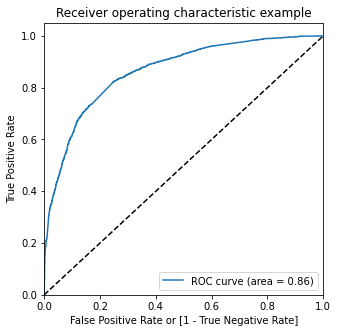

In [2232]:
# Plotting ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
# Area under the curve is 0.86

In [2233]:
# Adding the dataframe with different cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070457,3009,1,0,0,0,0,0,0,0,0,0
1,0,0.360483,1012,1,1,1,1,0,0,0,0,0,0
2,0,0.337270,9226,1,1,1,1,0,0,0,0,0,0
3,1,0.370908,4750,1,1,1,1,0,0,0,0,0,0
4,1,0.822674,7987,1,1,1,1,1,1,1,1,1,0


In [2234]:
# Preparing a table for probability, accuracy, sensitivity and specificity with different cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.527161  0.984056  0.240973
0.2   0.2  0.700362  0.905969  0.571575
0.3   0.3  0.770745  0.837285  0.729065
0.4   0.4  0.800189  0.705642  0.859411
0.5   0.5  0.795938  0.644317  0.890909
0.6   0.6  0.785703  0.577678  0.916005
0.7   0.7  0.765864  0.487326  0.940333
0.8   0.8  0.740041  0.374898  0.968758
0.9   0.9  0.690442  0.206051  0.993854


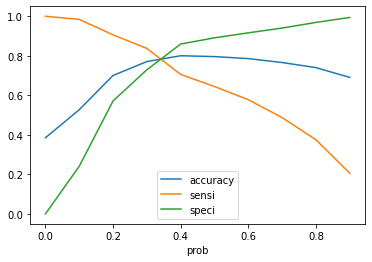

In [2235]:
# Plotting cutoff_df
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# Accuracy, Sensitivity and Specificity curve meets at around 0.3 value

In [2236]:
# Values greater than 0.3 predicted as 1 and values less than 0.3 predicted as 0
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.070457,3009,1,0,0,0,0,0,0,0,0,0,0
1,0,0.360483,1012,1,1,1,1,0,0,0,0,0,0,1
2,0,0.337270,9226,1,1,1,1,0,0,0,0,0,0,1
3,1,0.370908,4750,1,1,1,1,0,0,0,0,0,0,1
4,1,0.822674,7987,1,1,1,1,1,1,1,1,1,0,1


In [2237]:
# Assigning lead score by multiplying the converted prob with 100
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.070457,3009,0,7
1,0,0.360483,1012,1,36
2,0,0.337270,9226,1,34
3,1,0.370908,4750,1,37
4,1,0.822674,7987,1,82


In [2241]:
# Accuracy score
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7707447646039993

In [2242]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2847, 1058],
       [ 398, 2048]], dtype=int64)

In [2243]:
# Assigning the values for variables in confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2244]:
# sensitivity of model
TP / float(TP+FN)

0.8372853638593623

In [2245]:
# specificity of model
TN / float(TN+FP)

0.7290653008962868

In [2246]:
# False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2709346991037132


In [2247]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6593689632968448


In [2248]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8773497688751926


In [2250]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6593689632968448

In [2251]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8372853638593623

In [2255]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [2256]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

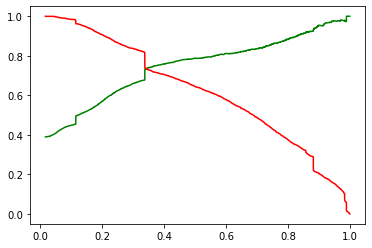

In [2257]:
# Plotting Precision, Recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [2258]:
# Checking X_test_sm columns
X_test_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [2260]:
# Predicting using model_10 on X_test_sm
y_test_pred = result_10.predict(X_test_sm)   

In [2262]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2263]:
# Checking first 5 entries of y_pred_1
y_pred_1.head()

,0
0,0.063726
1,0.975482
2,0.051137
3,0.881961
4,0.060332


In [2264]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2265]:
# Adding Prospect ID in the dataframe
y_test_df['Prospect ID'] = y_test_df.index

In [2266]:
# Adjusting the indices.
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2267]:
# Concatenating the y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2268]:
# Required test dataframe first 5 entries
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.063726
1,1,1490,0.975482
2,0,7936,0.051137
3,1,4216,0.881961
4,0,3830,0.060332


In [2269]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [2270]:
# Required test dataframe first 5 entries
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.063726
1,1,1490,0.975482
2,0,7936,0.051137
3,1,4216,0.881961
4,0,3830,0.060332


In [2271]:
# Rearranging the columns and assigning the lead score as converted probability
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [2272]:
# Required test dataframe first 5 entries
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.063726,6
1,1490,1,0.975482,98
2,7936,0,0.051137,5
3,4216,1,0.881961,88
4,3830,0,0.060332,6


In [2273]:
# Assigning the prediction as 1 if converted_prob > 0.3 and 0 if < 0.3
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [2274]:
# Required test dataframe first 5 entries
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3271,0,0.063726,6,0
1,1490,1,0.975482,98,1
2,7936,0,0.051137,5,0
3,4216,1,0.881961,88,1
4,3830,0,0.060332,6,0


In [2275]:
# checking if 80% cases are correctly predicted.
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    821
0    168
Name: final_Predicted, dtype: int64

In [2276]:
# check the precentage of final_predicted conversions on test data
821/float(821+168)

0.8301314459049545

In [2277]:
# Accuracy score on test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7690047741461623

In [2278]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1273,  461],
       [ 168,  821]], dtype=int64)

In [2279]:
# Assigning the variables from confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2280]:
# sensitivity of model
TP / float(TP+FN)

0.8301314459049545

In [2281]:
# specificity of model
TN / float(TN+FP)

0.7341407151095732

In [2282]:
# Precision score of model
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.640405616224649

In [2283]:
# Recall score of model
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8301314459049545